In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import learning_curve

In [2]:
adult_df = pd.read_csv('adult.csv', sep=',')
print("Kích thước của bộ dữ liệu:", adult_df.shape)
adult_df

Kích thước của bộ dữ liệu: (32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
print("Kiểu dữ liệu của các trường thuộc tính:")
print(adult_df.dtypes)

Kiểu dữ liệu của các trường thuộc tính:
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


In [4]:
def count_zero(vals):
    res = 0
    for val in vals:
        res += (val == 0)
    return res

In [5]:
adult_df = adult_df.replace("?", 0)

for col in adult_df.columns:
    if adult_df[col].dtype == 'object':
        vals = adult_df[col].value_counts().index.tolist()
        if (0 in vals):
            print(f'Cột "{col}" có {len(vals)} giá trị khác nhau và bao gồm {count_zero(adult_df[col])} giá trị 0')
        else:
            print(f'Cột "{col}" có {len(vals)} giá trị khác nhau và "không" bao gồm giá trị 0')

Cột "workclass" có 9 giá trị khác nhau và bao gồm 1836 giá trị 0
Cột "education" có 16 giá trị khác nhau và "không" bao gồm giá trị 0
Cột "marital.status" có 7 giá trị khác nhau và "không" bao gồm giá trị 0
Cột "occupation" có 15 giá trị khác nhau và bao gồm 1843 giá trị 0
Cột "relationship" có 6 giá trị khác nhau và "không" bao gồm giá trị 0
Cột "race" có 5 giá trị khác nhau và "không" bao gồm giá trị 0
Cột "sex" có 2 giá trị khác nhau và "không" bao gồm giá trị 0
Cột "native.country" có 42 giá trị khác nhau và bao gồm 583 giá trị 0
Cột "income" có 2 giá trị khác nhau và "không" bao gồm giá trị 0


In [6]:
no_samples = adult_df.shape[0]

adult_df = adult_df[adult_df["workclass"] != 0]
adult_df = adult_df[adult_df["native.country"] != 0]
adult_df = adult_df[adult_df["occupation"] != 0]

no_samples_after_remove_zero = adult_df.shape[0]
print(f'Đã loại bỏ {no_samples - no_samples_after_remove_zero} hàng')

Đã loại bỏ 2399 hàng


In [7]:
adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
adult_df.iloc[:,[0,2,4,10,11,12]] = sc.fit_transform(adult_df.iloc[:,[0,2,4,10,11,12]])
adult_df.iloc[:,[0,2,4,10,11,12]] = sc.transform(adult_df.iloc[:,[0,2,4,10,11,12]])

In [9]:
adult_df['education'].unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc',
       '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'],
      dtype=object)

In [10]:
adult_df['education'] = adult_df['education'].str.replace('HS-grad|9th|Preschool|12th|1st-4th|11th|10th|7th-8th|Some-college|5th-6th','Low-education',regex = True)
adult_df['education'] = adult_df['education'].str.replace('Assoc-voc|Masters|Prof-school|Doctorate','High-education',regex = True)

In [11]:
adult_df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [12]:
adult_df['marital.status'] = adult_df['marital.status'].str.replace('Widowed|Divorced|Separated|Never-married|Married-spouse-absent','no',regex = True)
adult_df['marital.status'] = adult_df['marital.status'].str.replace('Married-civ-spouse|Married-AF-spouse','yes',regex = True)

In [13]:
import category_encoders as ce

categorical_cols = []
for col in adult_df.columns[:-1]:
    if adult_df[col].dtype == 'object':
        categorical_cols.append(col)

encoder = ce.OrdinalEncoder(cols = categorical_cols)
modified_adult_df = encoder.fit_transform(adult_df.iloc[:, :-1])
X_adult_arr = modified_adult_df.to_numpy()
y_adult_arr = adult_df.iloc[:, -1].to_numpy()

<AxesSubplot:>

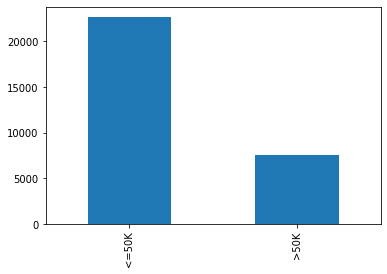

In [14]:
adult_df.iloc[:, -1].value_counts().plot(kind='bar')

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
def split_train_test(X_adult_arr, y_adult_arr):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    train_idx, test_idx = None, None

    for train_index, test_index in sss.split(X_adult_arr, y_adult_arr):
        train_idx = train_index
        test_idx = test_index
    
    adult_train_arr = {
    'data': X_adult_arr[train_idx, :],
    'target': y_adult_arr[train_idx]
    }

    adult_test_arr = {
        'data': X_adult_arr[test_idx, :],
        'target': y_adult_arr[test_idx]
    }

    return adult_train_arr, adult_test_arr

In [16]:
adult_train_arr, adult_test_arr = split_train_test(X_adult_arr, y_adult_arr)

In [17]:
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, adult_train_arr["data"], adult_train_arr["target"], cv=3, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    
    plt.errorbar(X, Y, error, linestyle='None', marker='o')


100%|██████████| 8/8 [01:41<00:00, 12.73s/it]


Text(0.5, 0, 'Number of estimators in Random Forests')

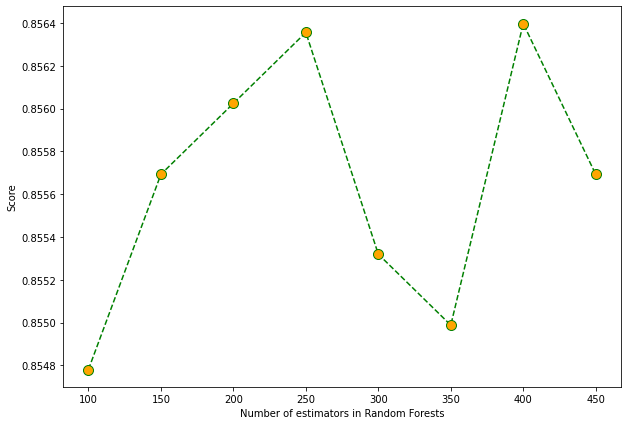

In [18]:
from tqdm import tqdm
scores = []
optimal_estimators = None
max_score = 0
for quantity in tqdm(range(100, 500, 50)):
    random_forest_clf = RandomForestClassifier(n_estimators=quantity)
    mean, std = cross_validation(random_forest_clf)
    scores.append(mean)
    if mean > max_score:
        max_score = mean
        optimal_estimators = quantity

plt.figure(figsize=(10, 7))
plt.plot(range(100, 500, 50), scores, color="green", linestyle="dashed", marker="o", markerfacecolor="orange", markersize=10)
plt.ylabel("Score")
plt.xlabel("Number of estimators in Random Forests")

100%|██████████| 2/2 [00:41<00:00, 20.66s/it]


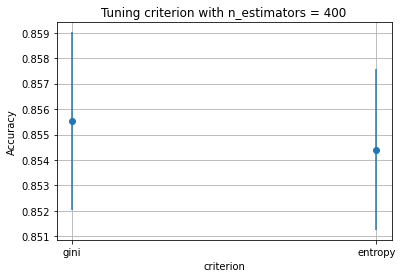

In [19]:
title = f'Tuning criterion with n_estimators = {optimal_estimators}'
xlabel = "criterion"
X = []
Y = []
error = []

for criterion in tqdm(["gini", "entropy"]):
    random_forest_clf = RandomForestClassifier(criterion=criterion, n_estimators=optimal_estimators)
    mean, std = cross_validation(random_forest_clf)
    X.append(str(criterion))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)
plt.savefig('RandomForest_tunning_criterion.png', bbox_inches='tight')
plt.show()


Accuracy_score: 0.8478368970661363


<AxesSubplot:title={'center':'Confustion Matrix For Test Data'}>

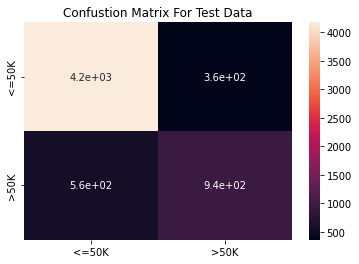

In [20]:
random_forest_clf = RandomForestClassifier(criterion='entropy', n_estimators=optimal_estimators)
random_forest_clf.fit(adult_train_arr['data'], adult_train_arr['target'])
y_pred = random_forest_clf.predict(adult_test_arr['data'])
print("Accuracy_score:", accuracy_score(y_pred, adult_test_arr['target']))

c_matrix = confusion_matrix(adult_test_arr['target'], y_pred)
labels = adult_df.iloc[:, -1].value_counts().index
c_matrix_df = pd.DataFrame(c_matrix, index = labels, columns = labels)
plt.title("Confustion Matrix For Test Data")
sns.heatmap(c_matrix_df, annot=True)


In [21]:
random_forest_clf.feature_importances_

array([0.16917356, 0.0358732 , 0.16008383, 0.03479811, 0.07736061,
       0.0809396 , 0.0775982 , 0.0985461 , 0.01532404, 0.01524818,
       0.10003401, 0.03164571, 0.08705023, 0.01632462])